# 파이썬으로 배우는 기계학습
# Machine Learning with Python
**************

# 제 10-2 강: 로지스틱 회귀 1$^{Logistic Regression}$

## 학습 목표
- 회귀 분석을 익힌다.
- 오차 함수의 차이를 인식한다.
- 다층 신경망에 두 개의 활성화 함수를 사용한다.
- 로지스틱 회귀 알고리즘을 배운다. 

## 학습 내용
- 회귀와 회귀 분석 정의
- 오차 함수의 차이
- 로지스틱 회귀

## 1. 회귀 정의
회귀(Regression) 혹은 회귀 분석(Regression Analysis)이란 한 개 이상의 변수를 다룰 때 특정 변수가 다른 변수와 어떤 관계를 맺는지 분석하고, 이를 바탕으로 __모델(Model)__ 즉 __함수__를 정의해 값을 예측하는 기법입니다.  

하나의 예를 통해서 설명하도록 하겠습니다. 학생들의 공부 시간과 학기말 시험 성적에 대한 데이터가 다음과 같다고 가정합니다.  공부를 많이 하면 할수록 성적이 잘 나오겠죠? 그러면, 과연 8시간을 공부한 사람은 성적이 얼마나 나올까 궁금하지 않습니까? 이러한 값(실수의 값)을 예측하는 것이 회귀분석입니다. 

| 공부 시간(x)  | 시험 성적(y) |
|:------------:|:-----------:|
|     10       |     100    |
|       9       |     85     |
|       7       |     80     |
|       6       |     60     |
|       9       |     95     |      
|       ...       |     ...      |
<center> 공부시간과 성적의 학습 자료 </center>


여기 우리가 앞으로 사용할 표기를 처음부터 정리할 둘 필요가 있습니다. 
```
m = 학습 자료(a tranining example)의 갯수
x = 독립 변수 혹은 입력 변수 즉 특성(features)을 나타냄
y = 종속 변수 혹은 출력 변수(target variable)
```
이러한 데이터의 모음 즉 입력 변수의 값(특성)과 출력 변수의 값(레이블)의 모음을 기계학습을 위한 학습 자료(training examples)라 부르며, $(x, y)$로 표기합니다. 입력 변수와 출력 변수(레이블)의 쌍으로 구성된 $(x, y)$의 $i$번째 훈련 자료는 윗첨자를 사용하여 $(x^{(i)}, y^{(i)})$ 표기합니다.  

----------

__JoyQuiz__: 앞에서 제시된 훈련 자료$(x, y)$에서 $y^{(3)}$의 값은 무엇입니까?

----------

앞에서 제시된 훈련 자료 중에서 첫 4개를 직관적인 이해를 돕기 위해여 도표로 그리면 다음과 같습니다.  파이썬 프로그램을 보면 쉽게 이해할 수 있을 것입니다. 

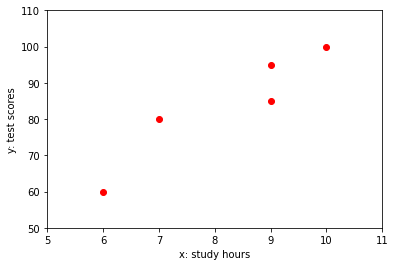

In [1]:
import matplotlib.pyplot as plt      
x = [10, 9, 7, 6, 9]                         # 시험 시간 데이타
y = [100, 85, 80, 60, 95]                 # 시험 성적 데이타
plt.plot(x, y, 'ro')                           # red and o shape marker
plt.xlim(5, 11)
plt.ylim(50, 110)
plt.xlabel("x: study hours")     
plt.ylabel("y: test scores")
plt.show()

이렇게 데이터가 누적되었을때, 공부 시간과 시험 성적간의 어떠한 상관관계가 있는지 살펴보면, 공부 시간이 x 일때  성적 y가 예측 가능 할 것입니다.  

다른 예로, 아이스크림 가게를 운영하고 있는데, 날씨와 판매량에 대한 데이타가 누적되어있고, 내일의 날씨를 안다면 , 내일 판매 될 아이스크림의 분량을 예측할 수 있고, 아이스크림 재료를 준비하는데 도움이 될 것입니다.  이렇게 두 데이타간의 상관관계가 있을때 이것에 대한 일반적인 식을 구해서 예측의 도구로 사용하는것을 __회귀분석__이라고 합니다. 

여기 예제와 같이 x, y 두 변수만 다루는 회귀분석을 __단순회귀분석__이라고 하며, 만약 여러 변수들을 다룰 경우에는 __다중회귀분석__이라 합니다. 특히 0 혹은 1, 혹은 Pass 혹은 Fail과 같이 두 가지로 결론을 내는 회귀분석을 __로지스틱회귀(Logistic Regression)__이라고 합니다. 여기서는 x, y 두 변수만을 다루는 단순회귀분석이며 동시에 두 변수가 선형관계임을 가정한 __선형회귀분석__을 해보고자 합니다.

## 2. 가설$^{hypothesis}$의 정의

공부시간과 성적이 서로 비례한다고 보면, 시간(x)과 성적(y)간의 상관관계는 다음과 같은 일차 함수로 나타낼 수 있다고 가정할 수 있습니다.  
$$y = ax + b$$

이러한 일차함수를 기계학습에서 사용할 때 그 확장성을 위하여 다음과 같이 표기합니다. 

$$h_{W,b}(x) = Wx + b$$

좀 더 간단히 표기하면, 

$$h(x) = Wx + b$$

여기서 $W$는 가중치(Weight) 즉 직선의 기울기에 해당하고, $b$는 y절편 즉 바이어스(bias)를 의미합니다. 

이렇게 회귀분석을 위하여 정의한 함수를 가리켜 __가설$^{Hypothesis}$함수__라고 하고 $H(x)$ 혹은 $h(x)$라고 표현합니다. 

앞에서 주어진 훈련 자료에 일부 훈련 자료를 지나는 직선 실선 두개(주황색과 파란색)를 먼저 그려보았습니다. 그러나, 직선의 기울기를 조정해볼지라도 네 점을 모두 지나는 일차함수(직선)을 찾을 수 없습니다. 그러면, 어떠한 기울기 $W$와  $b$를 가진 일차함수를 찾아야 할까요?  

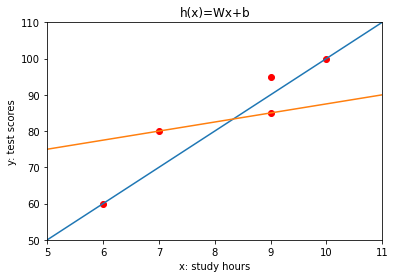

In [2]:
import matplotlib.pyplot as plt      
x = [10, 9, 7, 6, 9]                         # 시험 시간 데이타
y = [100, 85, 80, 60, 95]                 # 시험 성적 데이타
plt.plot(x, y, 'ro')                           # red and o shape markers
plt.plot([5, 11], [50, 110], [5, 11], [75, 90])
plt.xlim(5, 11)
plt.ylim(50, 110)
plt.xlabel("x: study hours")     
plt.ylabel("y: test scores")
plt.title('h(x)=Wx+b')
plt.show()

우리가 찾고자 하는 일차함수는 두 직선 사이 어디엔가 있을 것입니다.  우리는 일련의 반복 과정을 통해서 W와 b를 구하고, 그 최종의 결과 값을 사용해서 새로운 입력 자료에 대해서도 그 결과를 예측(prediction)하는데 사용하는 것입니다. 학습 결과로 나온 일차함수 즉 가설함수 $H(x)$를 __모델(model)__이라 부르고, "__학습되었다__"라고 합니다.  

## 3. 비용$^{Cost}$함수

우리가 구하려고 하는 일차함수(직선)는 각각의 훈련 자료($x^{(i)}, y^{(i)}$)에서 직선까지 거리$d_{i}$가 최소가 되도록 하는 $W$와 $b$를 구한다는 것입니다.  그런데, 이러한 거리들을 구할 때, 그 값이 음수가 나올 수 있으므로, 거리의 제곱을 하고 평균을 구하여 이 값을 최소가 되도록 하는 $W$와 $b$를 구해도 우리의 목적은 달성할 수 있습니다.  
<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/regressionCost.png?raw=true"  width="600">
<center>그림 x: 회귀분석 비용함수</center>

$$Total\ Distance = d_1 + d_2 + d_3 + d_4 + d_5 = \sum_{i=1}^{5} d_{i}$$

각 훈련 자료에서의 거리 $d_i$는 $(x^{(i)}, y^{(i)})$에서 $y^{(i)}$와 $x^{(i)}$에서의 함수값 $h(x^{(i)})$과의 차이이므로 그 거리는 $d_i = h(x^{(i)}) - y^{(i)}$ 입니다.  사실상 이 거리는 작을수록 좋은 것이며, 모든 훈련 자료가 완전히 가설과 일치하는 것입니다.  따라서 이 거리를 오차 혹은 비용(손실)이라고 간주할 수 있습니다.  이 거리가 음수가 나오지 않도록 제곱을 하고 또한 평균을 취한 것을 비용함수(Cost Function)라고 하며, 이 경우는 __SSE__(Squared Sum Error) 혹은 __MSE__(Mean Squared Error)을 사용한 것입니다. 참고로, 평균을 취할 때, $m$이 아니라 $2m$으로 나눈 것은 나중에 미분을 할 경우에 수식을 간단히 만들기 위한 것입니다.

\begin{align}
J(W, b) &= \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2 \\
&= \frac{1}{2m}\sum_{i=1}^{m}(h(x^{(i)}) - y^{(i)})^2 \\
&= \frac{1}{2m}\sum_{i=1}^{m}(Wx^{(i)} + b - y^{(i)})^2
\end{align}


$y\ hat$(햇)이라고 읽는 $\hat{y}^{(i)}$ 은 예측값 즉 $h(x^{(i)})$을 단순하게 표기한 것이며, $y^{(i)}$은 훈련 자료의 레이블(실제값)입니다.   $J(W,b)$는 $J$가 $W, b$의 함수라는 의미이며, $W$와 $b$가 변함에 따라 $J$의 값이 달라진다는 의미입니다. $J(W,b)$를 그림으로 나타내면 3차원이 될 것입니다. 

비용함수$J$의 함수값을 최소로 하는 $W, b$를 찾으면, 우리가 처음에 설정한 가설 $h(x) = Wx + b$이 결정되는 것입니다. 

### 예제 1

우리가 간단한 예제를 만들어 손실함수와 가설함수를 구하는 것을 손으로 직접 계산해보고자 합니다.  예를 들면, 다음과 같은 훈련 자료가 있다고 합시다. 

|     입력(x)  |  출력(y)  |
|:------------:|:---------:|
|       1       |     2    |
|       2       |     4    |
|       4       |     8     |

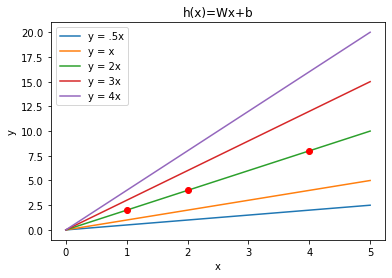

In [3]:
import matplotlib.pyplot as plt  
import numpy as np
x = [1, 2, 4]                       
y = [2, 4, 8]                 
w = np.arange(6)
plt.plot(w, 0.5 * w)
plt.plot(w, w)
plt.plot(w, 2.0 * w)
plt.plot(w, 3.0 * w)
plt.plot(w, 4.0 * w)
plt.legend(['y = .5x', 'y = x', 'y = 2x', 'y = 3x', 'y = 4x'], loc='upper left')
plt.plot(x, y, 'ro')     
plt.xlabel("x")     
plt.ylabel("y")
plt.title('h(x)=Wx+b')
plt.show()

위의 그래프는 $W$의 변화에 따른 $h(W)$를 표시한 것입니다. 이같은 경우 훈련 자료를 만족하는 1차 함수는 $y = 2x$이라는 정답을 우리는 이미 알고 있지만, 이 문제의 비용함수를 구하고, 비용함수 값이 최소일 때의 $W$를 구해보고자 합니다.   바이어스 $b$가 $0$이므로 손실함수는 다음과 같이 간단해지고, 우리의 목표는 이것을 최소화 하는 것입니다. 
\begin{align}
Minimize\ J(W,b) &= \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2 \\
&= \frac{1}{2m}\sum_{i=1}^{m}(h(x^{(i)}) - y^{(i)})^2 \\
&= \frac{1}{2m}\sum_{i=1}^{m}(Wx^{(i)} - y^{(i)})^2
\end{align}


\begin{align}
Minimize\ J(W) &= \frac{1}{2 * 3} \left((W * 1 - 2)^2 + (W * 2 - 4)^2 + (W * 4 - 8)^2 \right)\\
      &= \frac{1}{6} \left( (W^2 - 4W + 4) + (4W^2 - 16W + 16) + (16W^2 - 64W + 64) \right)\\
      &= \frac{1}{6} (21W^2 - 84W + 84)\\
\end{align}

__JoyQuiz__: 위의 그래프는  $W$ 의 변화에 따른  $h(W)$ 를 표시한 것입니다.  위의 그래프에서 $W$의 변화에 따라 $J(W)$의 변화를 표로 만들고, $W$ 와 $J(W)$의 관계를 그래프로 그려보십시오. 

|     W       |   J(W)  |
|:------------:|:-----------:|
|               |              |
|               |              |
|               |              |
|      4.0     |              |

**********

자, 우리는 이 손실함수$J(W)$의 함수값이 최소가 되는 $W$를 찾으면 됩니다.  $J(W)$를 최소로 하는 $W$를 어떻게 찾을까요? 

여기서 우리가 일일이 다 손으로 계산할 수 없으므로, 컴퓨터를 이용하여 $W=0.1, 0.2, 0.3, ... (b = 0)$가 아닐 경우, b의 값도 같은 방법으로) 값을 공식에 넣어보면서, 이 비용함수가 최소가 되는 W와 b를 찾으면 됩니다. 이 함수의 그래프를 그려보면 직감적으로 $W$를 알 수 있게 될 것입니다.   이러한 접근법을 무차별적$^{brute \ force}$ 방법이라고 합니다. 

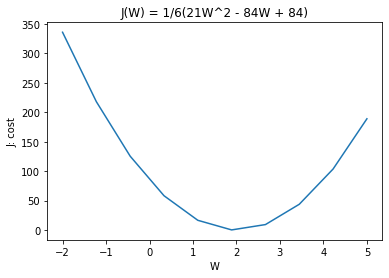

In [4]:
import matplotlib.pyplot as plt     
import numpy as np
w = np.linspace(-2, 5, num=10)
j = (21 * w**2 - 84 * w + 84)
plt.plot(w, j)  
plt.xlabel("W")     
plt.ylabel("J: cost")
plt.title('J(W) = 1/6(21W^2 - 84W + 84)')
plt.show()

위의 그래프를 보면, $J(W)$는 $W=2$ 일 때, 최소값을 갖는다는 것을 알 수 있습니다. 이것은 다른 말로, $W=2$일 때, 함수(그래프)의 변화율 $\frac{dJ(W)}{dW}$ 즉 미분값이 0 일 때, 최소값이라는 것을 알 수 있습니다. 

그러므로, 일반적으로 우리가 회귀분석 문제에서 손실함수를 구하기만 한다면, 그래프를 그리지 않고도, 그 손실함수를 미분하여 우리의 목적을 달성할 수 있습니다. 

그러므로 이제 우리가 계산한 손실함수$J(W)$를 미분하면, 다음과 같습니다. 

\begin{align}
\frac{dJ(W)}{dW} &= \frac{d}{dW}(21W^2 - 84W + 84)\\
                       &= 42W - 84\\
\end{align}

우리가 구하는 것은 $\frac{dJ(W)}{dW} = 0$ 이므로, 

\begin{align}
42W - 84 &= 0\\
W &= 2 \\
\therefore \quad h(x) &= 2x \\
\end{align}

## 4. 단순회귀의 해석적 해

다음과 같은 훈련 자료가 있다고 가정할 때, 어렵지 않게 가설함수 $h(x) = Wx + b = x + 4$ 이라는 것을 짐작할 수 있습니다. 이와같이 $b \neq 0$인 문제의 경우, 독립변수가 두 개이므로 문제가 약간 더 복잡해집니다.  우리는 이 문제를 해석적으로 계산하는 해를 구하려고 시도합니다. 또한 새로운 방법으로도 풀어나가는 방법에도 도전을 합시다.  

|     입력(x)  |  출력(y)  |
|:------------:|:---------:|
|       1       |     5    |
|       2       |     6    |
|       3       |     7     |
|       4       |     8    |

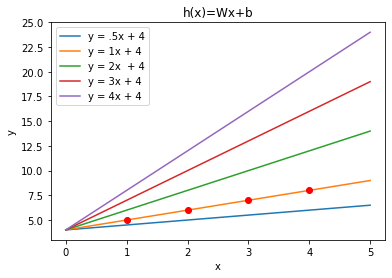

In [5]:
import matplotlib.pyplot as plt  
import numpy as np
x = [1, 2, 3, 4]                       
y = [5, 6, 7, 8]                 
w = np.arange(6)
plt.plot(w, 0.5 * w + 4)
plt.plot(w, w + 4)
plt.plot(w, 2.0 * w + 4)
plt.plot(w, 3.0 * w + 4)
plt.plot(w, 4.0 * w + 4)
plt.legend(['y = .5x + 4', 'y = 1x + 4', 'y = 2x  + 4', 'y = 3x + 4', 'y = 4x + 4'], loc='upper left')
plt.plot(x, y, 'ro')     
plt.xlabel("x")     
plt.ylabel("y")
plt.title('h(x)=Wx+b')
plt.show()

위의 그래프는 $b$는 변화하지 않고, 다만 $W$의 변화에 따른 $h(W, b)$를 표시한 것입니다. 이 예제에서 중요한 것은 독립 변수가 두 개 즉 $W$와 $b$가 있다는 것이며, 이를 그래프로 나타내려면 3차원이 공간이 필요하다는 사실입니다. 이를 그래프로 그려보면 다음과 같습니다. 

<img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/linearregression3d.png?raw=true" style="height:200px"> 
<center>그림 x: 회귀분석 비용함수 3D</center>

사실상 우리의 목표는 W와 b가 변화할 때 $J(W, b)$를 최소로 하는 $W$와 $b$를 찾는 것입니다. 그러므로, $J(W, b)$를 $W$와 $b$에 대해 각각 미분하여 해답을 구하도록 해야 합니다. 한 함수식에서 변수 두 개 이상에 대해 각 변수에 대해 미분하는 것을 __편미분(Partial derivative)__이라고 하며 다음과 같이 나타냅니다.

\begin{align}
J(W, b) &= \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2 \\
&= \frac{1}{2m}\sum_{i=1}^{m}(h(x^{(i)}) + b - y^{(i)})^2 \\
&= \frac{1}{2m}\sum_{i=1}^{m}(Wx^{(i)} + b - y^{(i)})^2
\end{align}

손실함수를 $W$에 대해 미분할 때, 유의할 것은 $W$에 대해 미분할 때는 $b$와 $y^{(i)}$는 변화하지 않으므로 $0$이 됩니다. 또한 $b$에 대해 미분할 때, $W$와 $y^{(i)}$는 변화하지 않으므로, $0$이 됩니다. 

\begin{align}
\frac{\partial J}{\partial W} &= 2 * \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)}) \frac{\partial (\hat{y}^{(i)}- y^{(i)})}{\partial W} \\
&= \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)}) \frac{\partial (Wx^{(i)} + b)}{\partial W} \\
&= \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)}) x^{(i)} \\
&= \frac{1}{m}\sum_{i=1}^{m}(Wx^{(i)} + b - y^{(i)}) x^{(i)} \\
\end{align}

\begin{align}
\frac{\partial J}{\partial b} &= 2 * \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)}) (\frac{\partial \hat{y}^{(i)}}{\partial b}) \\
&= \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)}) (1) \\
&= \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)}) \\
&= \frac{1}{m}\sum_{i=1}^{m}(Wx^{(i)} + b - y^{(i)})
\end{align}

이제 위의 두 식을 0로 놓고 W와 b에 대해 계산해서 풀면, 손실함수를 최소로 하는 W와 b의 값을 구할 수 있습니다. 
\begin{equation}
\frac{\partial J}{\partial W} = 0 \\
\frac{\partial J}{\partial b} = 0 \\
\end{equation}
이 두 방정식의 해답을 해석적으로 찾는 것을 이곳에서 다루지 않지만, 다음의 풀이와 해답을 참고하길 바랍니다.  다음의 풀이를 지금 이해할 수 없어도 본 강의를 이해하는데는 문제가 되지 않습니다. 
\begin{align}
\frac{\partial J}{\partial W} &= \frac{1}{m}\sum_{i=1}^{m}(Wx^{(i)} + b - y^{(i)}) x^{(i)} \\
                                      &= \frac{1}{m}\sum_{i=1}^{m}(W(x^{(i)})^2 + bx^{(i)} - y^{(i)}x^{(i)}) \\
                                      &= W\overline{x^2} + b\bar{x} - \overline{xy} = 0 \\                           
\\
\frac{\partial J}{\partial b} &=  \frac{1}{m}\sum_{i=1}^{m}(Wx^{(i)} + b - y^{(i)}) \\
                                      &= W\bar{x} + b - \bar{y} = 0 \\
\end{align}


두 방정식에서 미지수 W, b를 제외하고 다른 모든 것은 상수입니다. 미지수 W, b에대해 방정식을 풀면, 우리는 W와 b에 대해 다음과 같은 해석적 해를 얻을 수 있습니다. 
\begin{align}
W = \frac{\bar{x}\bar{y} - \overline{xy}} {\bar{x}^2 - \overline{x^2}} \qquad b = \bar{y} - \bar{x}\frac{\bar{x}\bar{y} - \overline{xy}}{\bar{x}^2 - \overline{x^2}} = \bar{y} - \bar{x}W\\
\end{align}


여기서 $\bar{x}$는 모든 $x$ 자료들의 평균 즉 $\frac{1}{m}\sum_{i=1}^{m}x^{(i)}$ 을 의미합니다.  비슷하게 $\overline{xy}$은 $x^{(i)}$와 $y^{(i)}$를 각각 곱한 후, 평균을 의미합니다. 


__JoyQuiz 3__:
예제 2에서 제시된 훈련 자료 즉 다음과 같은 자료에 적합한 즉 $J(W,b)$ 값을 최소화하는 가설$h(x)$의 $W$와 $b$를 해석적 해를 사용하여 구하십시오.  

|     입력(x)  |  출력(y)  |
|:------------:|:---------:|
|       1       |     5    |
|       2       |     6    |
|       3       |     7     |
|       4       |     8    |

__해답__: 다음 공식을 사용하여, 
\begin{align}
W = \frac{\bar{x}\bar{y} - \overline{xy}} {\bar{x}^2 - \overline{x^2}} \qquad b = \bar{y} - \bar{x}\frac{\bar{x}\bar{y} - \overline{xy}}{\bar{x}^2 - \overline{x^2}} = \bar{y} - \bar{x}W\\
\end{align}    

각 요소의 값을 먼저 구하면, 다음과 같다. 
\begin{align}
\bar{x} &= \frac{1 + 2 + 3 + 4}{4} = \frac{10}{4} = 2.5 \\
\bar{y} &= \frac{5 + 6 + 7 + 8}{4} = \frac{26}{4} = 6.5 \\
\overline{xy} &= \frac{1\times5 + 2\times6 + 3\times7 + 4\times8}{4} = \frac{70}{4} = 17.5 \\
\bar{x}^2 &= 2.5^2 = 6.25 \\
\overline{x^2} &= \frac{1^2 + 2^2 + 3^2 + 4^2}{4} = \frac{30}{4} = 7.5 
\end{align}  

그러면, $W$와 $b$의 값은 다음과 같다.
\begin{align}
W &= \frac{\bar{x}\bar{y} - \overline{xy}} {\bar{x}^2 - \overline{x^2}} = \frac{2.5 \times 6.5 - 17.5}{6.25 - 7.5} = 1 \\
b &= \bar{y} - \bar{x}W = 6.5 - 2.5 \times 1 = 4 \\
\therefore W &= 1 \\
b &= 4
\end{align}  

__JoyQuiz 4:__ 위의 그림 x: 손실함수 3D 그래프는 $W$와 $b$의 변화에 따른  $h(W, b)$ 를 표시한 것입니다.  $W$와 $b$의 변화에 따른 $J(W, b)$의 변화를 일부분 표로 만드십시오.  해석적 해와 일치하는 $W$와 $b$가 있습니까?

|     입력(x)  |  출력(y)  |
|:------------:|:---------:|
|       1       |     5    |
|       2       |     6    |
|       3       |     7     |
|       4       |     8    |

|     W       |      b        |  J(W,b)     |
|:------------:|:-----------:| ------------ |           
|      0        |     1        |               |
|      1       |      2        |               |
|      1       |      3        |                |
|      1       |      4        |                |
|      2       |      4        |                |



__해답__: 다음 공식에 $m=4$와 각각의 $W, b$를 적용하면, 다음과 같다. 
\begin{align}
J(W, b) &= \frac{1}{2m}\sum_{i=1}^{m}(Wx^{(i)} + b - y^{(i)})^2 \\
\end{align}

\begin{align}
J(0, 1) &= \frac{1}{2\times 4}\sum_{i=1}^{4}(0x^{(i)} + 1 - y^{(i)})^2 = \frac{1}{8} \left\{(1 - 5) + (1 - 6) + (1 - 7) + (1 - 8) \right\}^2 = \frac{1}{8} \times 22^2 \\
J(1, 2) & = \frac{1}{2\times 4}\sum_{i=1}^{4}(1x^{(i)} + 2 - y^{(i)})^2 = \frac{1}{8} \left\{(3 - 5) + (4 - 6) + (5 - 7) + (6 - 8) \right\}^2 = \frac{1}{8} \times 8^2\\
J(1, 3) & = \frac{1}{2\times 4}\sum_{i=1}^{4}(1x^{(i)} + 2 - y^{(i)})^2 = \frac{1}{8} \left\{(4 - 5) + (5 - 6) + (6 - 7) + (7 - 8) \right\}^2 = \frac{1}{8} \times 4^2 \\
J(1, 4) & = \frac{1}{2\times 4}\sum_{i=1}^{4}(1x^{(i)} + 2 - y^{(i)})^2 = \frac{1}{8} \left\{(5 - 5) + (6 - 6) + (7 - 7) + (8 - 8) \right\}^2 = \frac{1}{8} \times 0^2 \\
J(2, 4) & = \frac{1}{2\times 4}\sum_{i=1}^{4}(1x^{(i)} + 2 - y^{(i)})^2 = \frac{1}{8} \left\{(6 - 5) + (8 - 6) + (10 - 7) + (12 - 8) \right\}^2 = \frac{1}{8} \times 10^2 \\
\end{align}

그러므로, $J(W,b)$의 값들은 다음과 같고, $J(1,4)$에서 손실함수 값이 가장 적으며, 이는 해석해와 일치합니다. 

|     W       |      b        |  J(W,b)     |
|:------------:|:-----------:| ------------ |           
|      0        |     1        |     60.5          |
|      1       |      2        |     8.0          |
|      1       |      3        |     2.0           |
|      1       |      4        |     0.0           |
|      2       |      4        |     12.5          |

## 학습 정리
- 오차 함수들의 분석과 차이
- 3층 신경망에 두 개의 활성화 함수를 사용하기
- 로지스틱 회귀 알고리즘 익히기 


### 참고자료
- https://pythonkim.tistory.com/16
- https://pythonkim.tistory.com/22?category=573319 

----------
_In the beginning God created the heavens and the earth. Genesis1:1_